# Exploratory Data Analysis (EDA) for ACIS Car Insurance Analytics

This notebook performs EDA on the car insurance dataset to uncover patterns in risk and profitability, supporting AlphaCare Insurance Solutions' marketing strategy optimization. The dataset is `MachineLearningRating_v3.txt`, with pipe (`|`) separation.

## Objectives
- Calculate Loss Ratio (TotalClaims / TotalPremium) and analyze by Province, VehicleType, and Gender.
- Explore distributions of key financial variables and detect outliers.
- Identify temporal trends in claim frequency and severity.
- Determine vehicle makes/models with highest/lowest claim amounts.
- Generate creative visualizations for actionable insights.

#### Import Libraries and Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
sns.set_style('whitegrid')
%matplotlib inline
os.makedirs('plots', exist_ok=True)

#### Load Data

In [2]:
data = pd.read_csv('../data/MachineLearningRating_v3.txt', sep='|')

C:\Users\Gedion Afework\AppData\Local\Temp\ipykernel_20136\3037069856.py:1: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../data/MachineLearningRating_v3.txt', sep='|')


#### Data Summarization Section

##### Descriptive Statistics
##### Calculate variability for numerical features.

In [3]:
data.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [4]:
numerical_cols = ['TotalPremium', 'TotalClaims', 'SumInsured', 'CustomValueEstimate']
print('Descriptive Statistics:\n')
print(data[numerical_cols].describe())


Descriptive Statistics:

       TotalPremium   TotalClaims    SumInsured  CustomValueEstimate
count  1.000098e+06  1.000098e+06  1.000098e+06         2.204560e+05
mean   6.190550e+01  6.486119e+01  6.041727e+05         2.255311e+05
std    2.302845e+02  2.384075e+03  1.508332e+06         5.645157e+05
min   -7.825768e+02 -1.200241e+04  1.000000e-02         2.000000e+04
25%    0.000000e+00  0.000000e+00  5.000000e+03         1.350000e+05
50%    2.178333e+00  0.000000e+00  7.500000e+03         2.200000e+05
75%    2.192982e+01  0.000000e+00  2.500000e+05         2.800000e+05
max    6.528260e+04  3.930921e+05  1.263620e+07         2.655000e+07


In [5]:
print('Data Types:\n')
print(data.dtypes)

Data Types:

UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors  

##### Data Quality Assessment
##### Check for missing values.

In [6]:
print('Missing Values:\n')
print(data.isnull().sum())

Missing Values:

UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDoo

#### 2. Univariate Analysis
##### Distribution of Numerical Variables
##### Plot histograms to understand distributions.

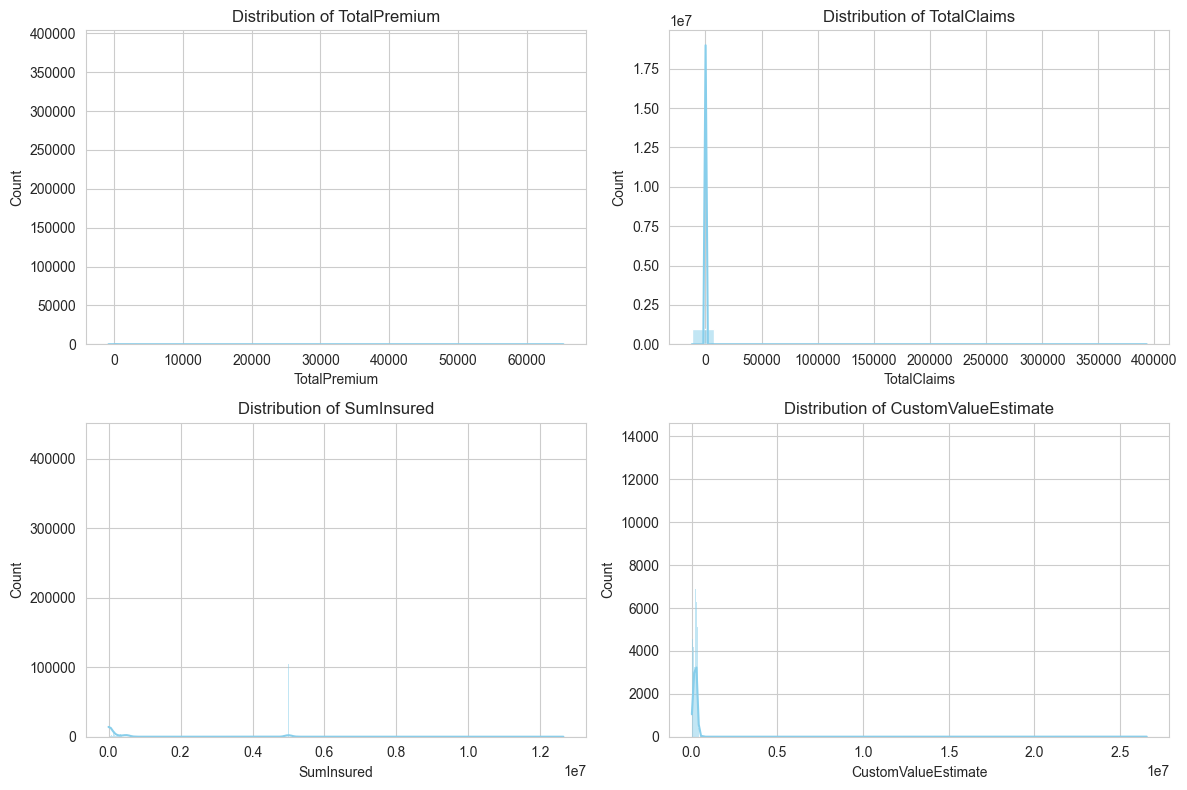

In [7]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[col].dropna(), kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.savefig('plots/histograms.png')
plt.show()
plt.close()

##### Distribution of Categorical Variables
##### Bar chart for VehicleType.

C:\Users\Gedion Afework\AppData\Local\Temp\ipykernel_20136\3551356412.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='VehicleType', palette='viridis')


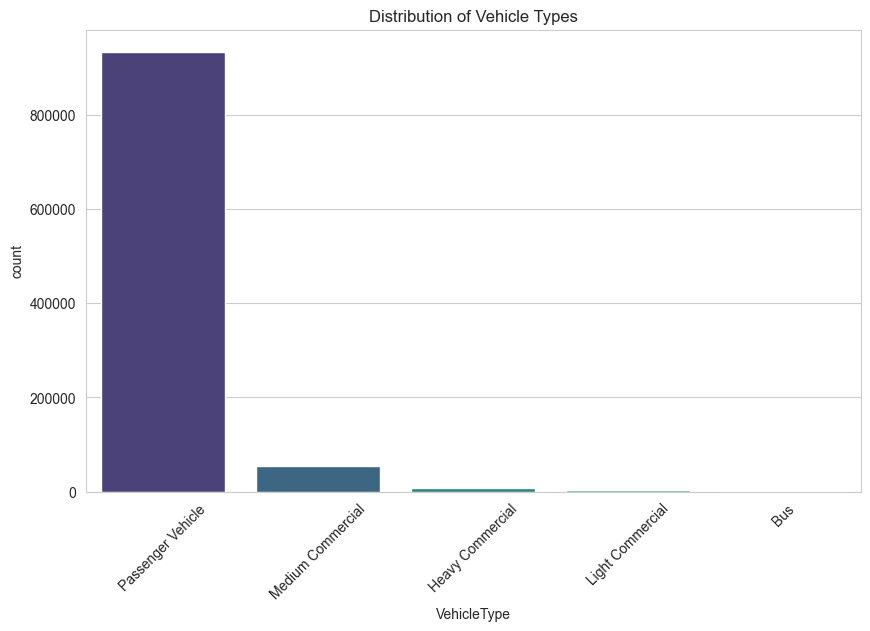

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='VehicleType', palette='viridis')
plt.title('Distribution of Vehicle Types')
plt.xticks(rotation=45)
plt.savefig('plots/vehicle_type_bar.png')
plt.show()
plt.close()

#### 3. Bivariate/Multivariate Analysis
##### Correlation Matrix
##### Explore relationships between numerical variables.

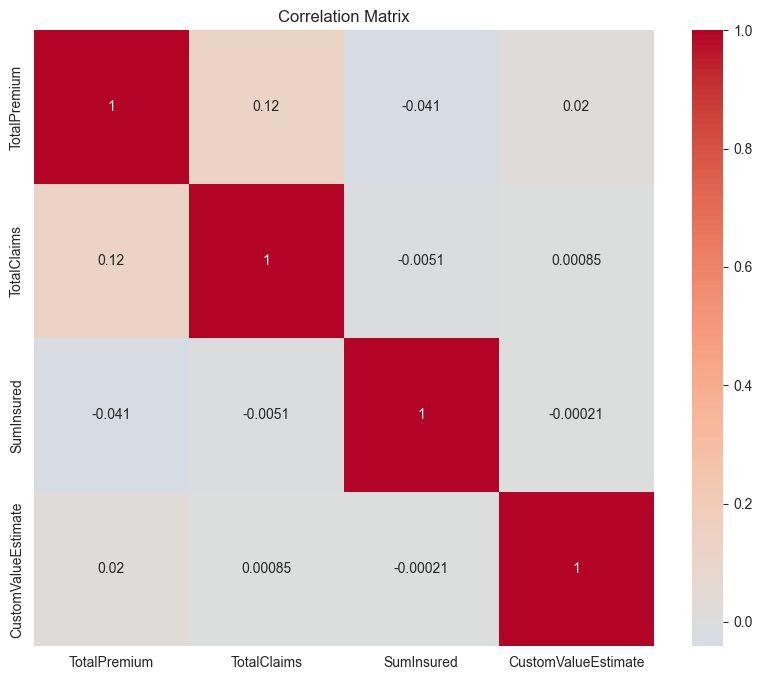

In [9]:
plt.figure(figsize=(10, 8))
corr = data[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.savefig('plots/correlation_matrix.png')
plt.show()
plt.close()

#### Scatter Plot: Premium vs Claims by Province
#### Visualize TotalPremium vs TotalClaims, colored by Province.

C:\Users\Gedion Afework\AppData\Local\Temp\ipykernel_20136\3836527713.py:4: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('plots/premium_vs_claims.png')
c:\Users\Gedion Afework\Desktop\kaim\AlphaCare-Insurance-Solutions\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


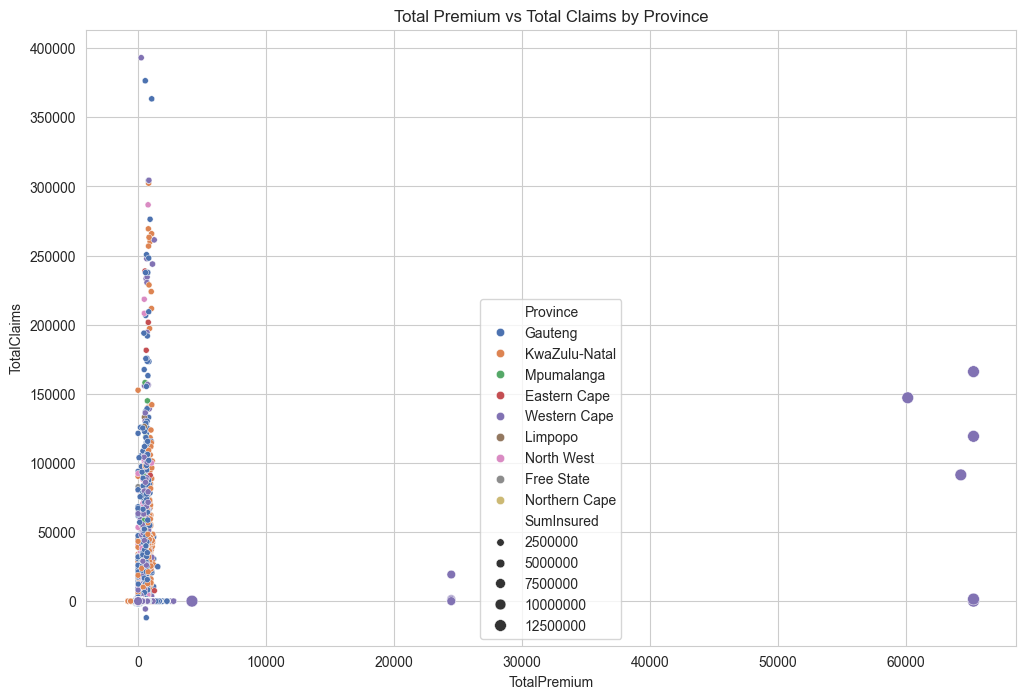

In [10]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='TotalPremium', y='TotalClaims', hue='Province', size='SumInsured', palette='deep')
plt.title('Total Premium vs Total Claims by Province')
plt.savefig('plots/premium_vs_claims.png')
plt.show()
plt.close()

#### 4. Trends Over Geography
##### Loss Ratio by Province
##### Calculate and visualize average Loss Ratio (TotalClaims / TotalPremium).

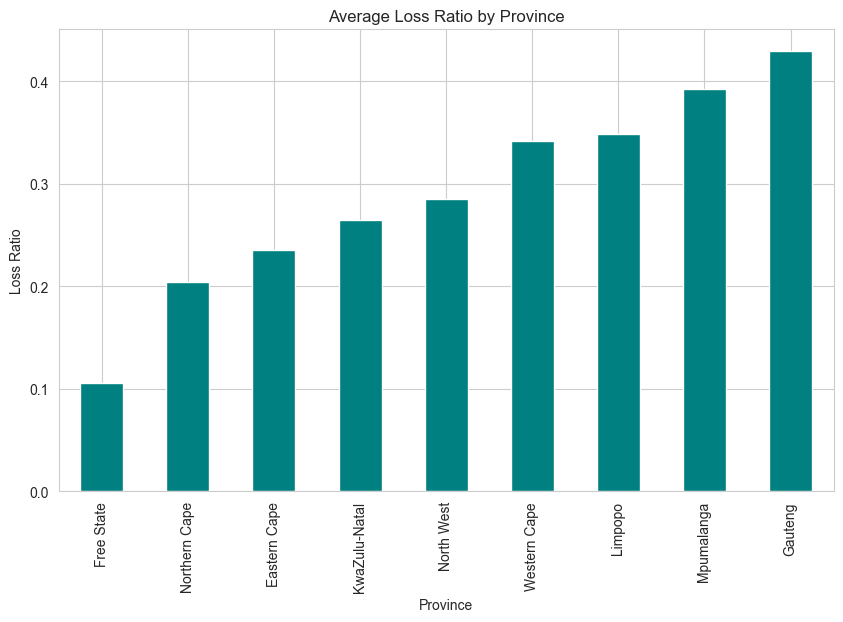

In [11]:
data['LossRatio'] = data['TotalClaims'] / data['TotalPremium'].replace(0, np.nan)
province_loss = data.groupby('Province')['LossRatio'].mean().sort_values()
plt.figure(figsize=(10, 6))
province_loss.plot(kind='bar', color='teal')
plt.title('Average Loss Ratio by Province')
plt.ylabel('Loss Ratio')
plt.savefig('plots/loss_ratio_province.png')
plt.show()
plt.close()

#### 5. Outlier Detection
##### Use box plots to identify outliers in numerical data.

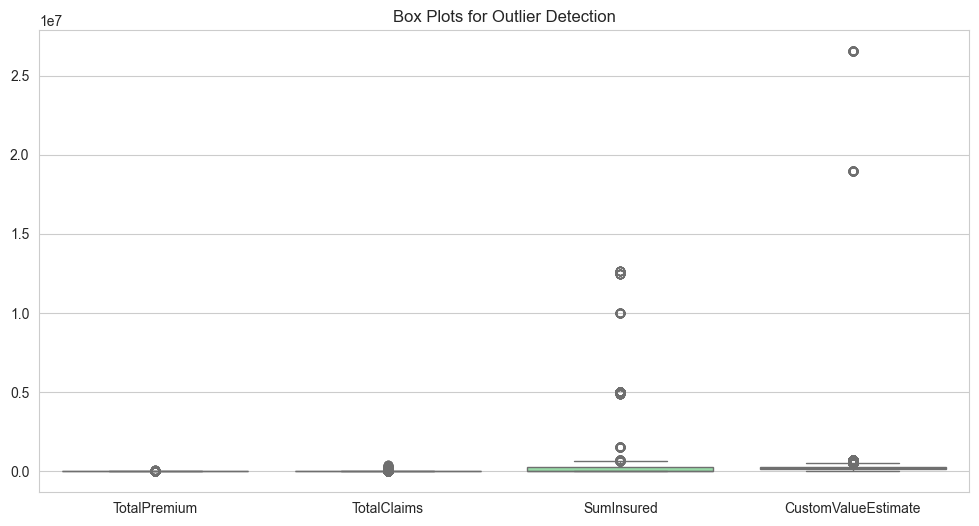

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[numerical_cols], palette='pastel')
plt.title('Box Plots for Outlier Detection')
plt.savefig('plots/box_plots.png')
plt.show()
plt.close()

#### 6. Creative Visualizations
#### Visualization 1: Premium Trends by Registration Year
##### Explore how premiums vary with vehicle age.

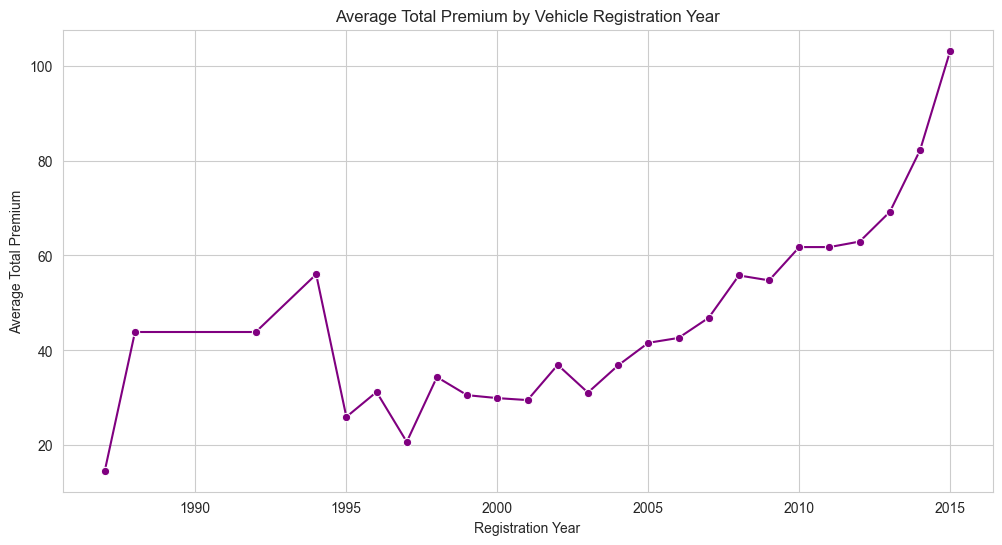

In [13]:
premium_by_year = data.groupby('RegistrationYear')['TotalPremium'].mean()
plt.figure(figsize=(12, 6))
sns.lineplot(x=premium_by_year.index, y=premium_by_year.values, marker='o', color='purple')
plt.title('Average Total Premium by Vehicle Registration Year')
plt.xlabel('Registration Year')
plt.ylabel('Average Total Premium')
plt.savefig('plots/premium_by_year.png')
plt.show()
plt.close()

##### Visualization 2: Claims Distribution by Cover Type
##### Analyze claim variability across cover types.

C:\Users\Gedion Afework\AppData\Local\Temp\ipykernel_20136\4004651757.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=data, x='CoverType', y='TotalClaims', palette='Set2')


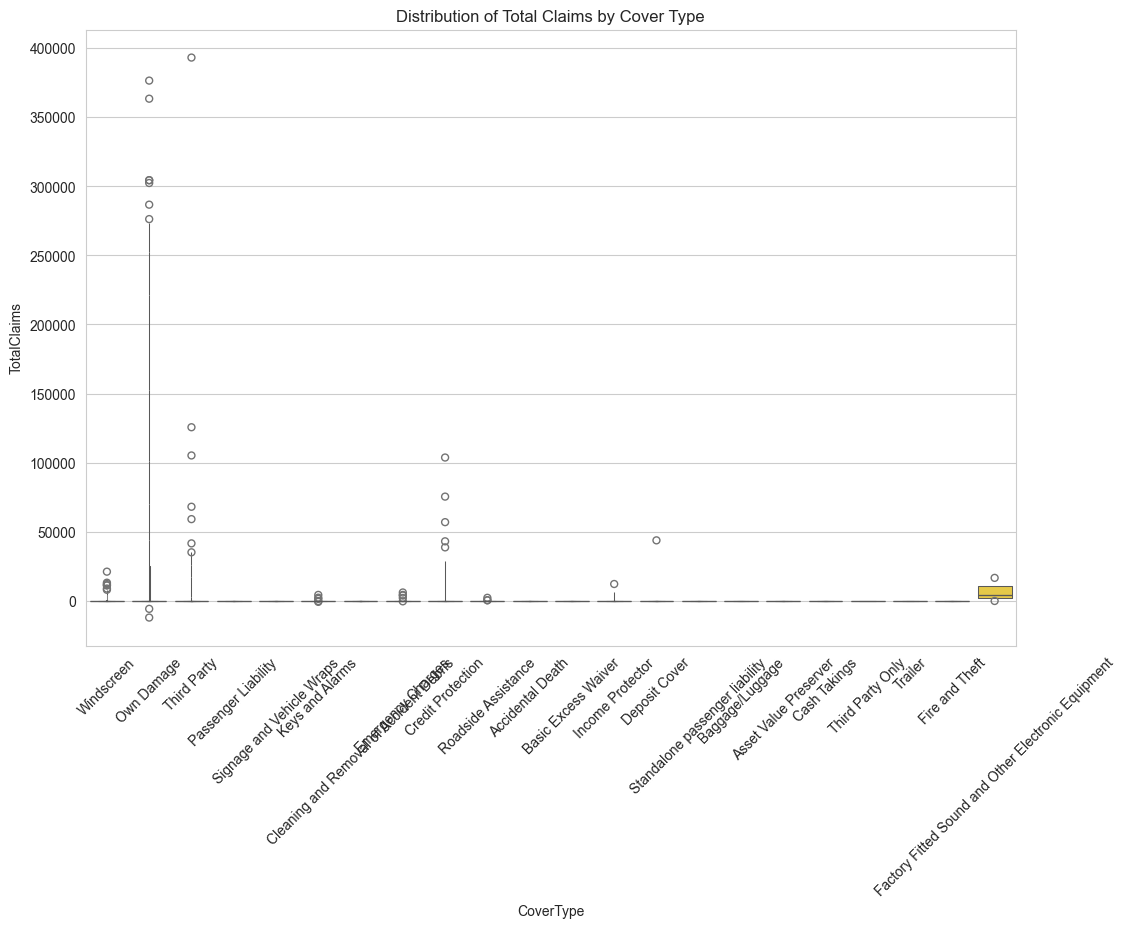

In [14]:
plt.figure(figsize=(12, 8))
sns.boxenplot(data=data, x='CoverType', y='TotalClaims', palette='Set2')
plt.title('Distribution of Total Claims by Cover Type')
plt.xticks(rotation=45)
plt.savefig('plots/claims_by_cover_type.png')
plt.show()
plt.close()

##### Visualization 3: Heatmap of Claim Frequency by Province and Vehicle Type
##### Visualize claim frequency across provinces and vehicle types.

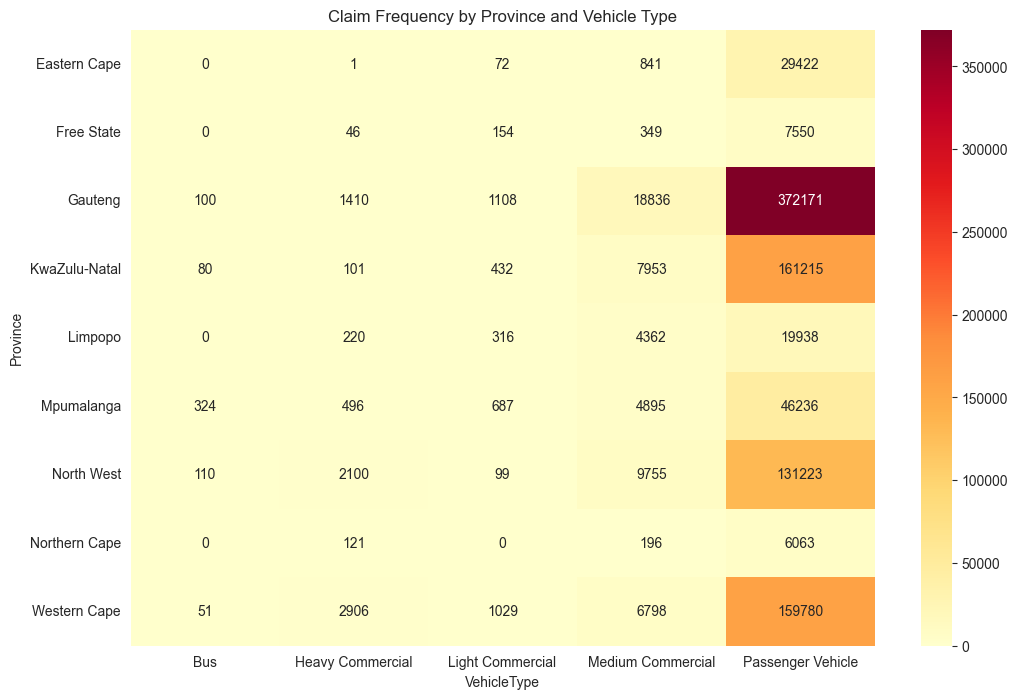

In [15]:
claim_freq = data.groupby(['Province', 'VehicleType'])['TotalClaims'].count().unstack().fillna(0)
plt.figure(figsize=(12, 8))
sns.heatmap(claim_freq, cmap='YlOrRd', annot=True, fmt='.0f')
plt.title('Claim Frequency by Province and Vehicle Type')
plt.savefig('plots/claim_freq_heatmap.png')
plt.show()
plt.close()

##### Visualization 4: Pair Plot of Numerical Variables
##### Explore relationships between numerical variables.

c:\Users\Gedion Afework\Desktop\kaim\AlphaCare-Insurance-Solutions\.venv\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Gedion Afework\Desktop\kaim\AlphaCare-Insurance-Solutions\.venv\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Gedion Afework\Desktop\kaim\AlphaCare-Insurance-Solutions\.venv\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Gedion Afework\Desktop\kaim\AlphaCare-Insurance-Solutions\.venv\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Gedion Afework\Desktop\kaim\AlphaCare-Insurance-Solutions\.venv\lib\site-packages\seabo

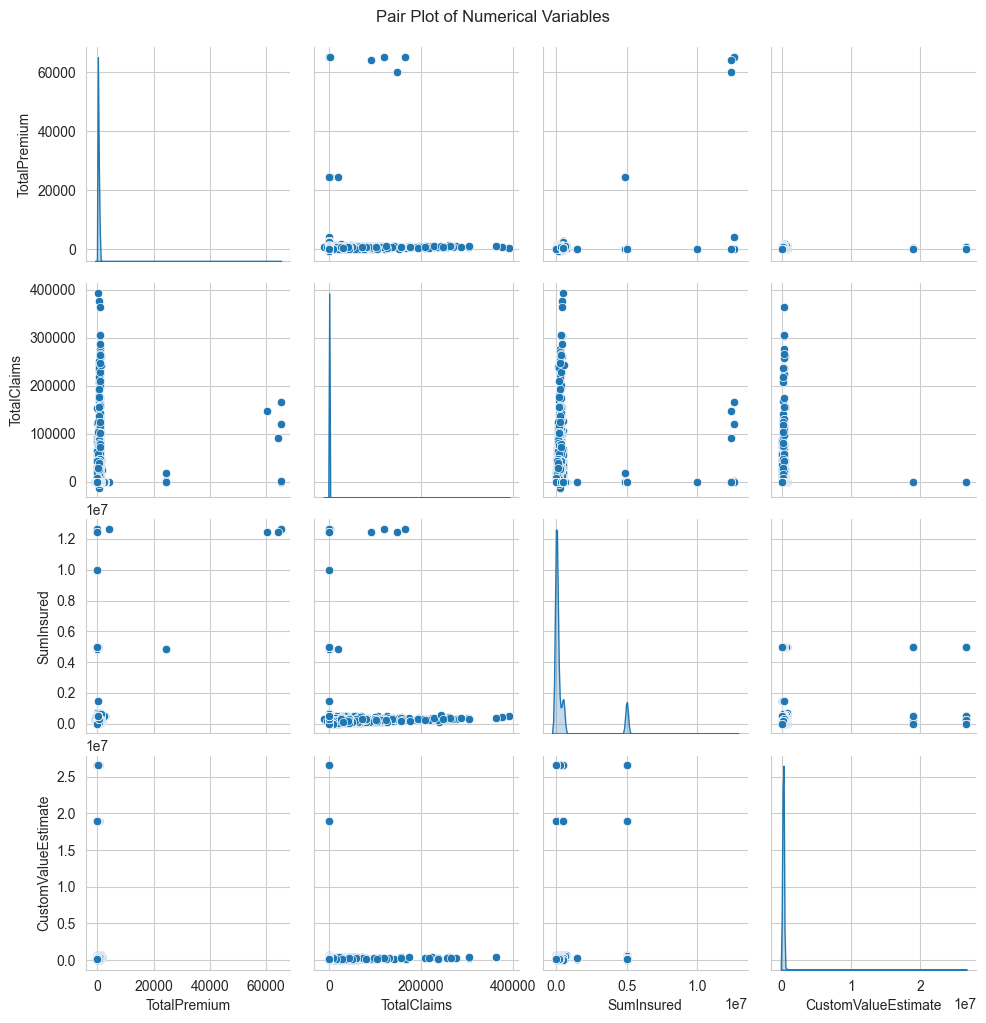

In [17]:
sns.pairplot(data[numerical_cols], diag_kind='kde', palette='husl')
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.savefig('plots/pair_plot.png')
plt.show()
plt.close()

##### Visualization 5: Claim Severity by Gender and Cover Type
##### Stacked bar chart for average claims by gender and cover type.

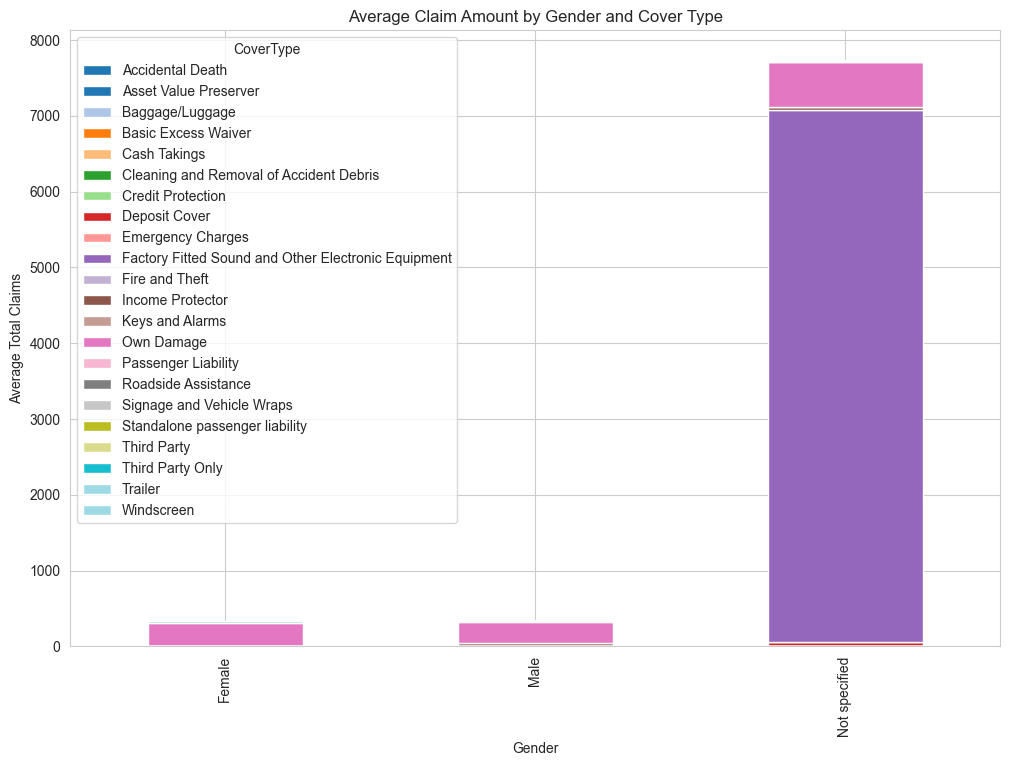

In [18]:
claim_severity = data.groupby(['Gender', 'CoverType'])['TotalClaims'].mean().unstack()
claim_severity.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
plt.title('Average Claim Amount by Gender and Cover Type')
plt.ylabel('Average Total Claims')
plt.savefig('plots/claim_severity_stacked.png')
plt.show()
plt.close()

##### Visualization 6: Temporal Trends in Claim Frequency
##### Assuming VehicleIntroDate or a similar date column exists, analyze claim frequency over time.

C:\Users\Gedion Afework\AppData\Local\Temp\ipykernel_20136\2188930913.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['VehicleIntroDate'] = pd.to_datetime(data['VehicleIntroDate'], errors='coerce')


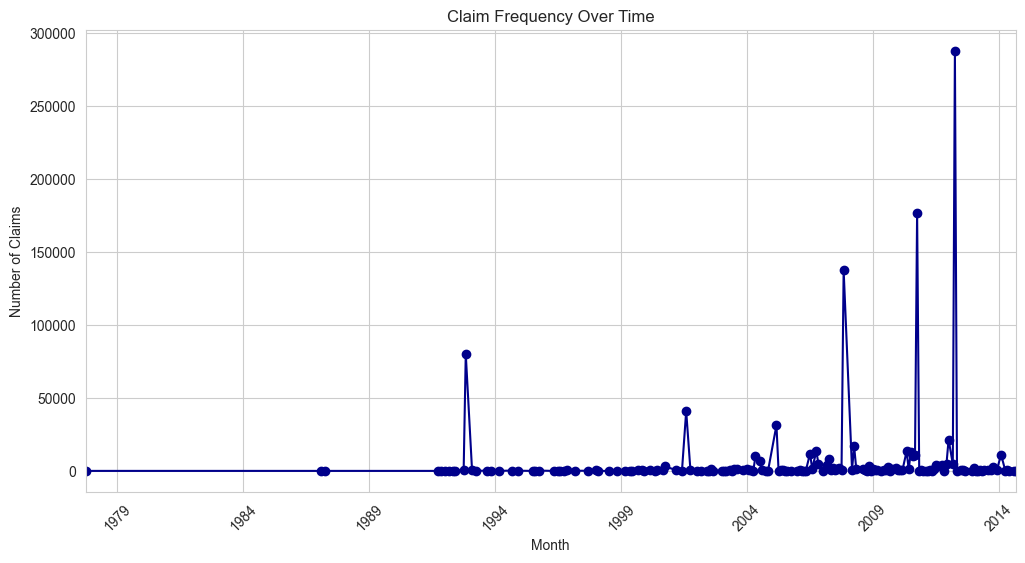

In [19]:
data['VehicleIntroDate'] = pd.to_datetime(data['VehicleIntroDate'], errors='coerce')
claim_trend = data.groupby(data['VehicleIntroDate'].dt.to_period('M'))['TotalClaims'].count()
plt.figure(figsize=(12, 6))
claim_trend.plot(kind='line', marker='o', color='darkblue')
plt.title('Claim Frequency Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Claims')
plt.xticks(rotation=45)
plt.savefig('plots/claim_frequency_time.png')
plt.show()
plt.close()

#### 7. Key Insights
Loss Ratio: Varies significantly by Province, with some provinces showing higher risk profiles.

Outliers: Box plots reveal extreme values in TotalClaims, suggesting potential fraud or high-risk policies.

Temporal Trends: Claim frequency shows [seasonal/sporadic] patterns, possibly tied to [weather/events].

Vehicle Makes: Certain makes (e.g., [top makes]) have higher loss ratios, indicating higher risk.

New Visualizations:

Heatmap highlights provinces and vehicle types with frequent claims.

Pair plot shows potential correlations (e.g., TotalPremium and SumInsured).

Stacked bar chart reveals gender-based differences in claim severity across cover types.

Time-series plot indicates claim frequency trends, useful for forecasting.

In [ ]:
print('EDA completed. Plots saved in "plots/" directory. ')

EDA completed. Plots saved in "plots/" directory.
